# Creating Classification model on Income(same dataset as used in logistic_regression) using K-nearest neighbour classification

In [50]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [51]:
# importing data
data = pd.read_csv('income(1).csv', na_values = [' ?'])

In [52]:
# Data- preprocessing

data.isnull().sum()


age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [53]:
missing = data[data.isnull().any(axis = 1)]
missing

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
8,17,NaN,11th,Never-married,NaN,Own-child,White,Female,0,0,5,United-States,"less than or equal to 50,000"
17,32,NaN,Some-college,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
29,22,NaN,Some-college,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
42,52,NaN,12th,Never-married,NaN,Other-relative,Black,Male,594,0,40,United-States,"less than or equal to 50,000"
44,63,NaN,1st-4th,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31892,59,NaN,Bachelors,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
31934,20,NaN,HS-grad,Never-married,NaN,Other-relative,White,Female,0,0,35,United-States,"less than or equal to 50,000"
31945,28,NaN,Some-college,Married-civ-spouse,NaN,Wife,White,Female,0,1887,40,United-States,"greater than 50,000"
31967,80,NaN,HS-grad,Widowed,NaN,Not-in-family,White,Male,0,0,24,United-States,"less than or equal to 50,000"


In [54]:
data2 = data.dropna(axis = 0)
data2.isnull().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [55]:
print(data2['SalStat'].unique())

[' less than or equal to 50,000' ' greater than 50,000']


In [56]:
# Reindexing salary status to 0,1
data2 = pd.DataFrame(data2)
data2.loc[:,'SalStat'] = data2['SalStat'].map({' less than or equal to 50,000':0, ' greater than 50,000':1})
print(data2['SalStat'])

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: object


In [57]:
new_data  = pd.get_dummies(data2 , drop_first = True).astype(int)
new_data

,age,capitalgain,capitalloss,hoursperweek,JobType_ Local-gov,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,JobType_ State-gov,JobType_ Without-pay,...,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia,SalStat_1
0,45,0,0,28,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,24,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,44,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,27,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,0,0,35,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,594,0,60,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
31974,34,0,0,40,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
31975,23,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
31976,42,0,0,40,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [58]:
# Storing columns names
columns_list = list(new_data.columns)
print(columns_list)

['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'JobType_ Local-gov', 'JobType_ Private', 'JobType_ Self-emp-inc', 'JobType_ Self-emp-not-inc', 'JobType_ State-gov', 'JobType_ Without-pay', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-serv', 'occu

In [59]:
# separating target var from data
features =list(set(columns_list) - set(['SalStat']))
print(features)

['JobType_ Without-pay', 'EdType_ Preschool', 'nativecountry_ Thailand', 'maritalstatus_ Separated', 'nativecountry_ Greece', 'occupation_ Prof-specialty', 'EdType_ Prof-school', 'nativecountry_ Hungary', 'EdType_ Assoc-voc', 'nativecountry_ England', 'hoursperweek', 'JobType_ Self-emp-not-inc', 'nativecountry_ El-Salvador', 'nativecountry_ Scotland', 'EdType_ 7th-8th', 'race_ White', 'EdType_ 12th', 'nativecountry_ Portugal', 'race_ Black', 'JobType_ State-gov', 'nativecountry_ China', 'occupation_ Sales', 'nativecountry_ Guatemala', 'SalStat_1', 'EdType_ Masters', 'EdType_ Doctorate', 'EdType_ Some-college', 'nativecountry_ Dominican-Republic', 'nativecountry_ Laos', 'nativecountry_ Outlying-US(Guam-USVI-etc)', 'occupation_ Tech-support', 'EdType_ Bachelors', 'nativecountry_ India', 'gender_ Male', 'maritalstatus_ Married-AF-spouse', 'occupation_ Transport-moving', 'nativecountry_ South', 'occupation_ Exec-managerial', 'nativecountry_ Iran', 'relationship_ Unmarried', 'capitalloss', 

In [60]:
# storing target var in y
y = new_data['SalStat_1'].values
print(y)

[0 0 1 ... 0 0 0]


In [61]:
# storing values fromm independent var
x = new_data[features].values
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [62]:
# Splitting the data into train and test

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3, random_state = 0)

# KNN

In [64]:
# storing k-nearest neighbour classifier


KNN_classifier = KNeighborsClassifier(n_neighbors = 5)

In [65]:
# fitting the values for x and y

KNN_classifier.fit(train_x, train_y)

KNeighborsClassifier()

In [66]:
# predicting the test values with model
prediction = KNN_classifier.predict(test_x)

In [67]:
prediction = pd.DataFrame(prediction)
print(prediction.value_counts())

0
0    7024
1    2025
Name: count, dtype: int64


[[6630  193]
 [ 394 1832]]
Axes(0.125,0.11;0.62x0.77)


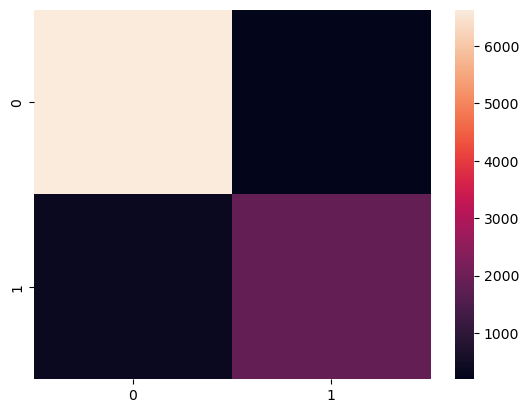

In [68]:
# Performance metric check

confusionmatrix = confusion_matrix(test_y, prediction)
print(confusionmatrix)
print(sns.heatmap(confusionmatrix))

In [69]:
# calculating accuracy

accuracy_score = accuracy_score(test_y, prediction)
print(accuracy_score)

0.9351309536965411


In [70]:
print('Misclassified samples : %d' % (test_y != prediction).sum())

ValueError: Unable to coerce to Series, length must be 1: given 9049

In [ ]:
# Effect of K - value on classifier

Misclassified_sample = []
# cal errors for K values b/w 1 and 20
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(train_x, train_y)
    pred_i = knn.predict(test_x)
    Misclassified_sample.append((test_y != pred_i).sum())

print(Misclassified_sample)